CASE STUDY -9    (Unsupervised learning)


Problem statement: To try out different clustering models in the given dataset. Finding the optimum 
number of clusters in each model and creating the model with optimum number of 
clusters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Loading the data

In [2]:
df= pd.read_csv(r'C:\Users\91944\Desktop\For GitHub\Unsupervised-wine\Wine_clust.csv')

Feature Description

In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [5]:
df.shape

(178, 13)

Checking for missing values

In [6]:
#Checking null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
#No null values present in the dataset

<AxesSubplot:>

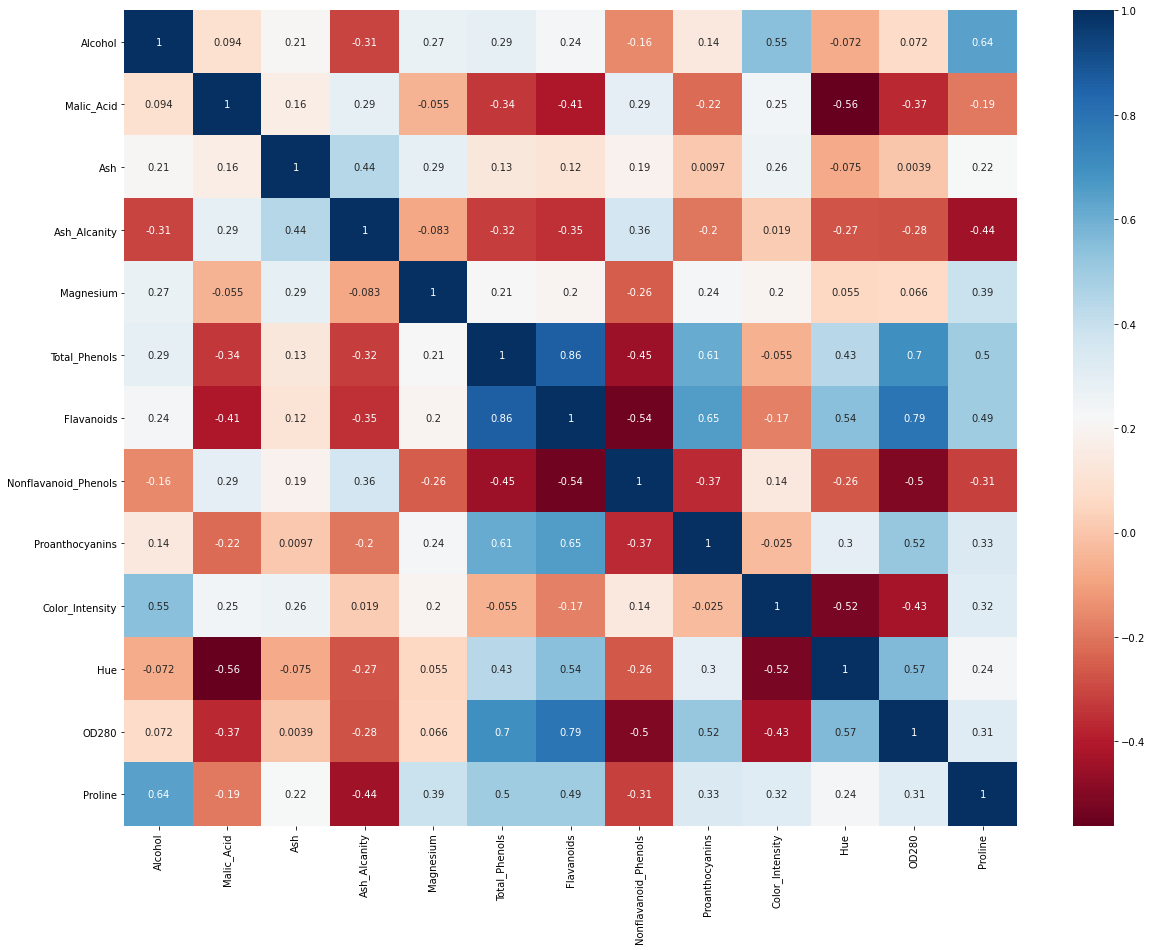

In [8]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'RdBu')

Data Preprocessing

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
#Applying Normalization
from sklearn import preprocessing
norm= preprocessing.Normalizer()
df=norm.fit_transform(df)
df=pd.DataFrame(df)
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019950,0.003711,0.003644,0.031124,0.151541,0.003444,0.002973,0.000581,0.002396,0.007342,0.001477,0.003993,0.986018
std,0.007321,0.002499,0.001409,0.014671,0.054081,0.001543,0.001802,0.000327,0.001249,0.003843,0.000736,0.001979,0.010073
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001746,0.000277,0.001515,0.004612,0.000970,0.002535,0.981687
50%,0.018984,0.003174,0.003468,0.030036,0.146777,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988441
75%,0.024783,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.014852,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021876,0.004727,0.010858,0.997835


## KMEANS CLUSTERING

In [11]:
from sklearn.cluster import KMeans
wcss=[]

In [12]:
# Using kmeans++ to find no: of clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init= 'k-means++', random_state= 42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)
  print(kmeans.inertia_)

0.5893776280459067
0.21097561296654627
0.10306150549665624
0.0591007341301072
0.03967340500897675
0.031229113729223216
0.02670871208092469
0.023446412195563607
0.020448544329050244
0.018637869045077478


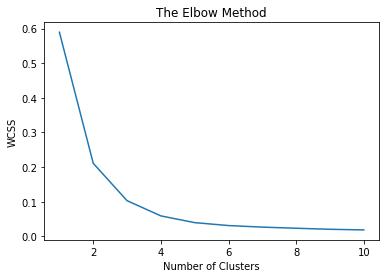

In [13]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# We can apply k means with optimum number of clusters as 3

In [15]:
kmeans= KMeans(n_clusters=3, init='k-means++', random_state =42)
y_kmeans = kmeans.fit_predict(df)
type(df)

pandas.core.frame.DataFrame

In [16]:
X = np.array(df)
type(X)

numpy.ndarray

In [17]:
y_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

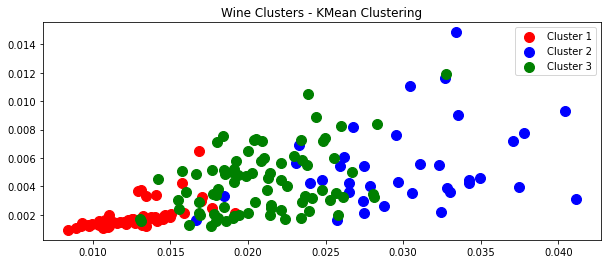

In [18]:
#plotting
plt.figure (figsize=(10,4))
plt.scatter(X[y_kmeans ==0,0], X[y_kmeans ==0,1], s=100,c='red', label='Cluster 1')
plt.scatter(X[y_kmeans ==1,0], X[y_kmeans ==1,1], s=100,c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans ==2,0], X[y_kmeans ==2,1], s=100,c='green', label='Cluster 3')

plt.title('Wine Clusters - KMean Clustering')
plt.legend()
plt.show()

## AGGLOMERATIVE HIERARCHICAL CLUSTERING

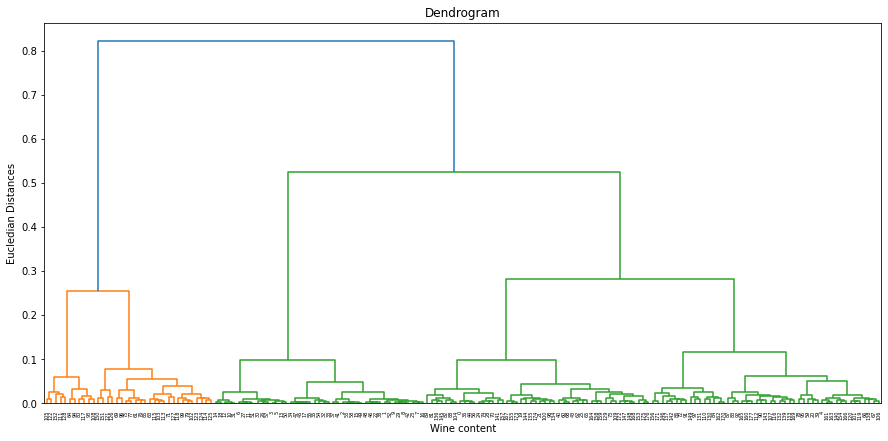

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure (figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine content')
plt.ylabel('Eucledian Distances')
plt.show()

In [20]:
# Taking cluster= 3
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=3, affinity='euclidean' , linkage='ward')
y_hc= hc.fit_predict(X)
y_hc

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

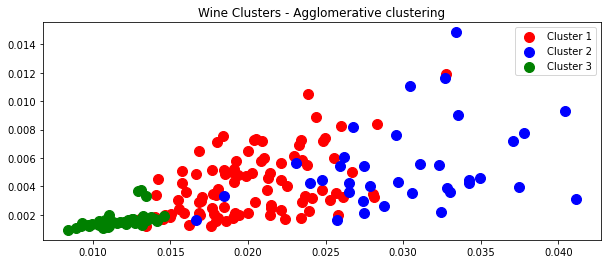

In [21]:
plt.figure (figsize=(10,4))
plt.scatter(X[y_hc ==0,0], X[y_hc ==0,1], s=100,c='red', label='Cluster 1')
plt.scatter(X[y_hc ==1,0], X[y_hc ==1,1], s=100,c='blue', label='Cluster 2')
plt.scatter(X[y_hc ==2,0], X[y_hc ==2,1], s=100,c='green', label='Cluster 3')
plt.title('Wine Clusters - Agglomerative clustering')
plt.legend()
plt.show()

Dataset - Wine Clust.csv
Steps Performed:
1. Loading the data
2. Feature Description
3. Data Visualization
4. Checking for Missing values
5. Preprocessing-Normalization
6. KMeans Clustering
7. Agglomerative Hierarchical Clustering


